In [2]:
# Import libraries
import pandas as pd
import numpy as ny
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics

In [3]:
# Define function to plot decision tree (REMEMBER TO RUN THIS CELL!)
def plot_tree(model, predictors):
    classes = ['Male', 'Female'] # class labels
    plt.figure(figsize = (15, 15)) # set figure size (if needed)
    tree.plot_tree(model,
                   feature_names = predictors,  # feature_names indicates the names of the predictors
                   class_names = classes,       # class_names indicates the names of the classes
                   filled = True, impurity = False)
    plt.show()

**STEP 1 (10 pts.).**
**Load and prepare data**

In [4]:
# Load dataset
data = pd.read_csv('abalone.csv')

In [5]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [6]:
# Remove missing values
data.dropna(axis=1, inplace=True)

In [7]:
# Remove values that are not M or F
data.drop(data.index[data['Sex'] == 'I'], inplace = True)
data.shape

(2835, 9)

In [8]:
# Convert categorical features to numerical values
change_values = {'M' : 0, 'F' : 1}
data['Sex'] = data['Sex'].map(change_values)

In [9]:
# Add an extra column to include age 
data['Age'] = data['Rings'] + 1.5

**STEP 2 (20 pts.).**
**Explore data**

In [10]:
# Display information for all features
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             2835 non-null   int64  
 1   Length          2835 non-null   float64
 2   Diameter        2835 non-null   float64
 3   Height          2835 non-null   float64
 4   Whole_weight    2835 non-null   float64
 5   Shucked_weight  2835 non-null   float64
 6   Viscera_weight  2835 non-null   float64
 7   Shell_weight    2835 non-null   float64
 8   Rings           2835 non-null   int64  
 9   Age             2835 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 243.6 KB


In [11]:
# Compute summary statistics for all features
data.describe()

Sex       Length     Diameter       Height  Whole_weight  \
count  2835.000000  2835.000000  2835.000000  2835.000000   2835.000000   
mean      0.461023     0.569552     0.446407     0.154437      1.016849   
std       0.498566     0.095821     0.078850     0.037421      0.453217   
min       0.000000     0.155000     0.110000     0.015000      0.015500   
25%       0.000000     0.515000     0.400000     0.135000      0.701250   
50%       0.000000     0.585000     0.460000     0.155000      1.003000   
75%       1.000000     0.635000     0.500000     0.175000      1.289500   
max       1.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings          Age  
count     2835.000000     2835.000000   2835.000000  2835.000000  2835.000000  
mean         0.439051        0.222526      0.291208    10.900882    12.400882  
std          0.212193        0.101880      0.128835     3.069252     3.069252  
min          0.006500        0.003000      0.005000     3.000000     4.500000  
25%          0.287000        0.152000      0.202500     9.000000    10.500000  
50%          0.431500        0.217000      0.285000    10.000000    11.500000  
75%          0.568750        0.287500      0.365000    12.000000    13.500000  
max          1.488000        0.760000      1.005000    29.000000    30.500000

[Text(0.5, 1.0, 'Number of Rings of an Abalone'),
 Text(0.5, 0, 'Number of Rings')]

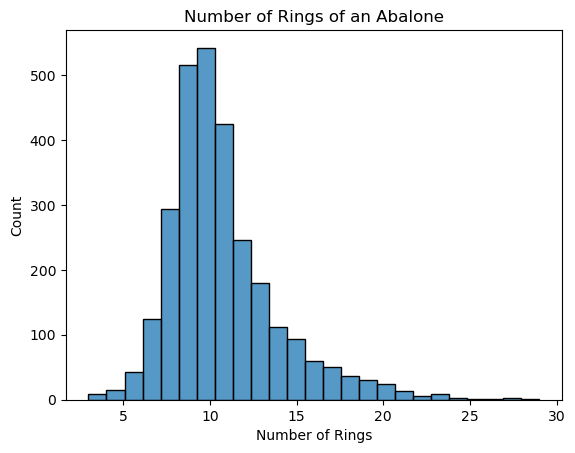

In [12]:
# Create multiple histograms
# Histogram of rings
ax = sns.histplot(data, x='Rings', bins=25)
ax.set(title='Number of Rings of an Abalone', xlabel='Number of Rings')

[Text(0.5, 1.0, 'Length of an Abalone (mm)'), Text(0.5, 0, 'Abalone Length')]

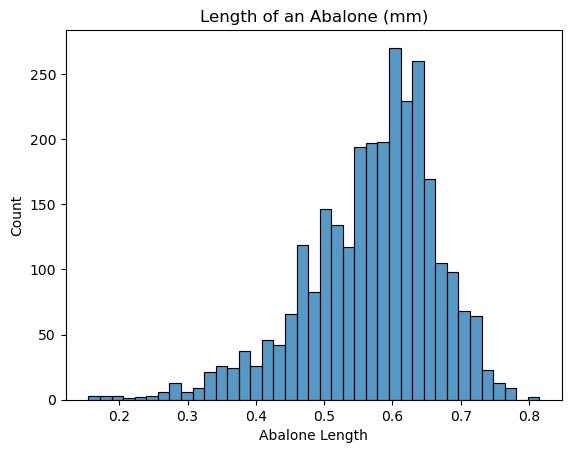

In [13]:
# Histogram of length
ax = sns.histplot(data, x='Length')
ax.set(title='Length of an Abalone (mm)', xlabel='Abalone Length')

[Text(0.5, 1.0, 'Length of an Abalone Grouped by Sex'),
 Text(0.5, 0, 'Length (mm)')]

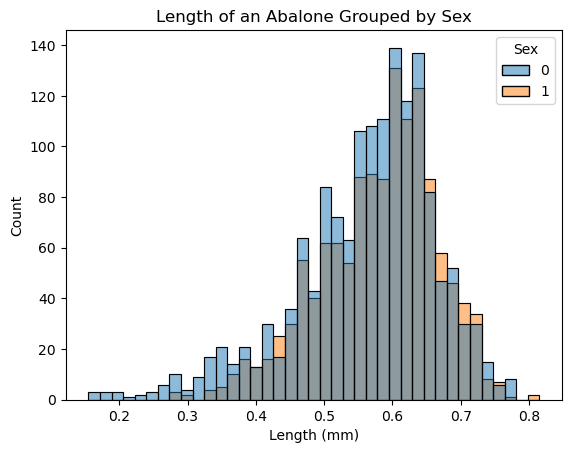

In [14]:
# Histogram of 'Length' grouped by 'Sex'
ax = sns.histplot(data, x='Length', hue='Sex')
ax.set(title='Length of an Abalone Grouped by Sex', xlabel='Length (mm)')

[Text(0.5, 1.0, 'Age of an Abalone Grouped by Sex'), Text(0.5, 0, 'Age')]

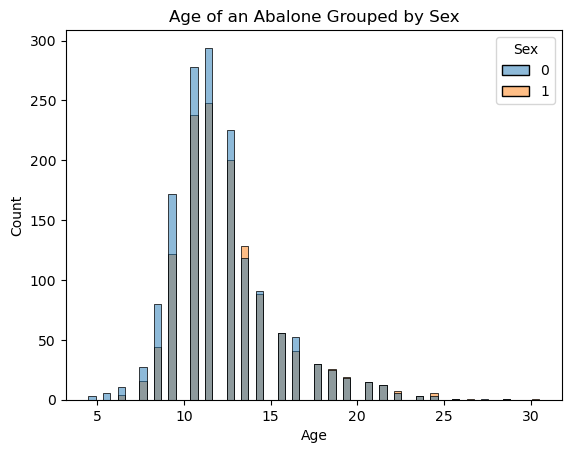

In [16]:
# Histogram of 'Age' Grouped by 'Sex'
ax = sns.histplot(data, x='Age', hue='Sex')
ax.set(title='Age of an Abalone Grouped by Sex', xlabel='Age')

[Text(0.5, 1.0, 'Number of Rings of an Abalone'),
 Text(0.5, 0, 'Number of Rings')]

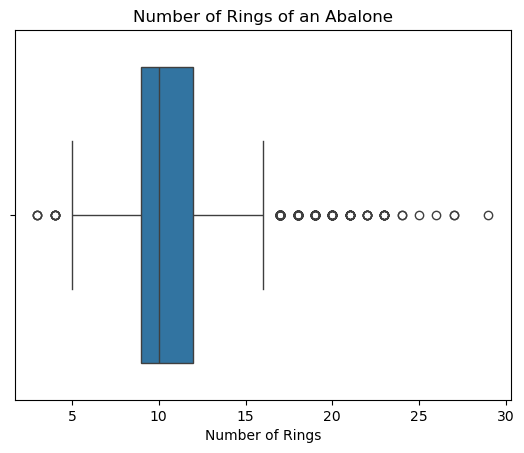

In [15]:
# Create multiple box plots
# Box plot of 'Rings'
ax = sns.boxplot(data, x='Rings')
ax.set(title='Number of Rings of an Abalone', xlabel='Number of Rings')

[Text(0.5, 1.0, 'Length of an Abalone'), Text(0.5, 0, 'Abalone Length (mm)')]

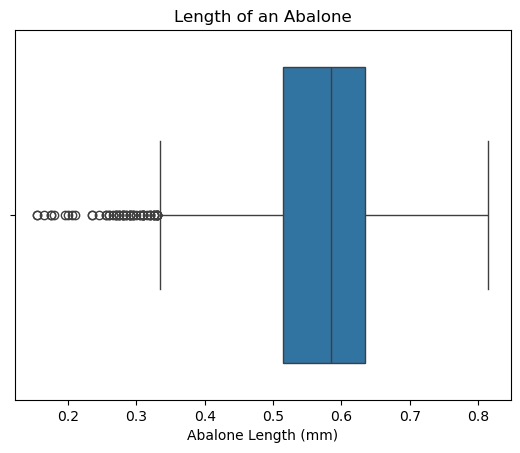

In [16]:
# Box Plot of 'Length'
ax = sns.boxplot(data, x='Length')
ax.set(title='Length of an Abalone', xlabel='Abalone Length (mm)')

[Text(0.5, 1.0, 'Length of an Abalone Grouped by Sex'),
 Text(0.5, 0, 'Abalone Length (mm)')]

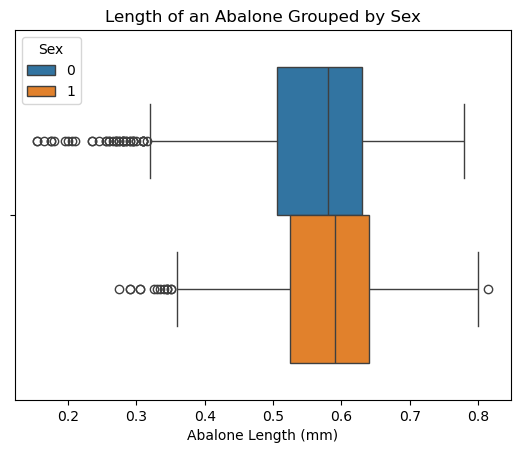

In [17]:
# Box Plot of 'Length' grouped by 'Sex'
ax = sns.boxplot(data, x='Length', hue='Sex')
ax.set(title='Length of an Abalone Grouped by Sex', xlabel='Abalone Length (mm)')

[Text(0.5, 1.0, 'Age of an Abalone Grouped by Sex'), Text(0.5, 0, 'Age')]

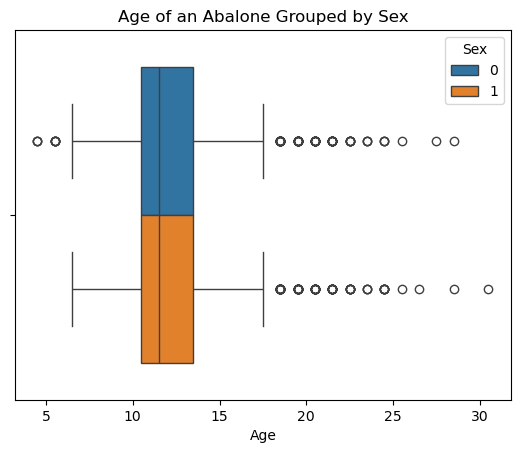

In [17]:
# Box Plot of 'Age' Grouped by 'Sex'
ax = sns.boxplot(data, x='Age', hue='Sex')
ax.set(title='Age of an Abalone Grouped by Sex', xlabel='Age')

[Text(0.5, 1.0, 'Number of Rings of an Abalone'),
 Text(0.5, 0, 'Number of Rings')]

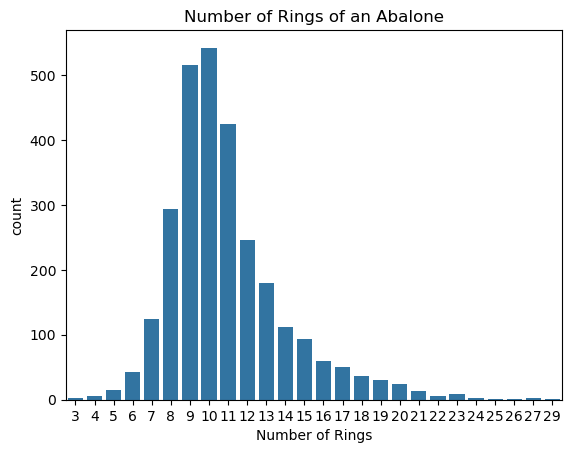

In [18]:
# Create multiple bar charts
# Bar chart of 'Rings'
ax = sns.countplot(data, x='Rings')
ax.set(title='Number of Rings of an Abalone', xlabel='Number of Rings')

[Text(0.5, 1.0, 'Number of Rings of an Abalone Grouped by Sex'),
 Text(0.5, 0, 'Number of Rings')]

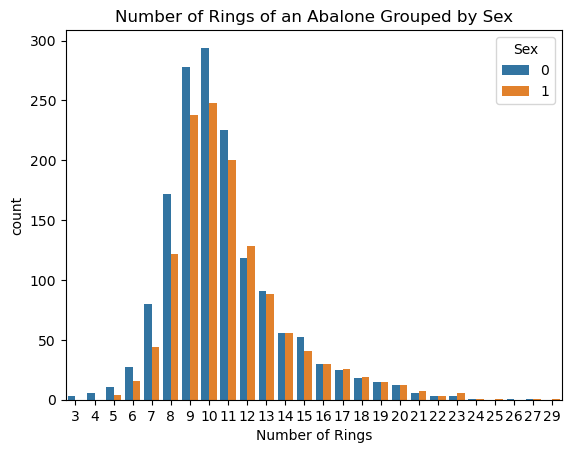

In [19]:
# Bar plot of 'Rings' grouped by 'Sex'
ax = sns.countplot(data, x='Rings', hue='Sex')
ax.set(title='Number of Rings of an Abalone Grouped by Sex', xlabel='Number of Rings')

[Text(0.5, 1.0, 'Age of an Abalone Grouped by Sex'), Text(0.5, 0, 'Age')]

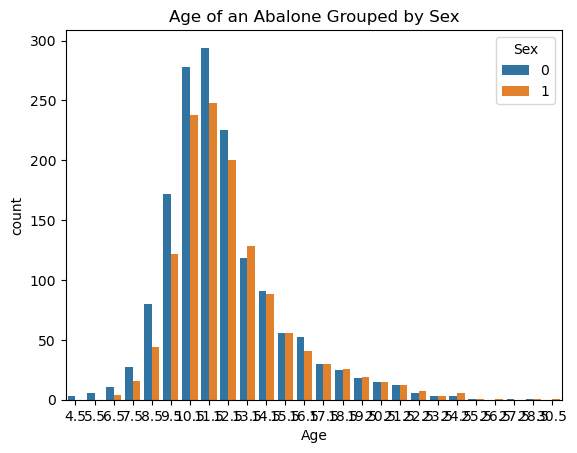

In [18]:
# Bar chart of 'Age' Grouped by 'Sex'
ax = sns.countplot(data, x='Age', hue='Sex')
ax.set(title='Age of an Abalone Grouped by Sex', xlabel='Age')

[Text(0.5, 1.0, 'Age of an Abalone'), Text(0.5, 0, 'Age')]

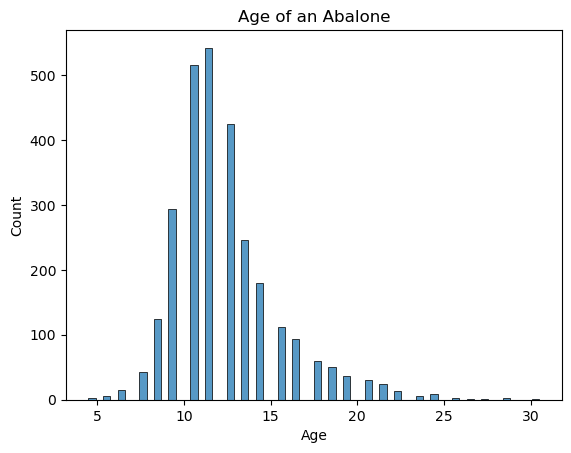

In [19]:
# Bar Plot of 'Age'
ax = sns.histplot(data, x='Age')
ax.set(title='Age of an Abalone', xlabel='Age')

[Text(0.5, 1.0, 'Abalone Length vs Height'),
 Text(0.5, 0, 'Length (mm)'),
 Text(0, 0.5, 'Height (mm)')]

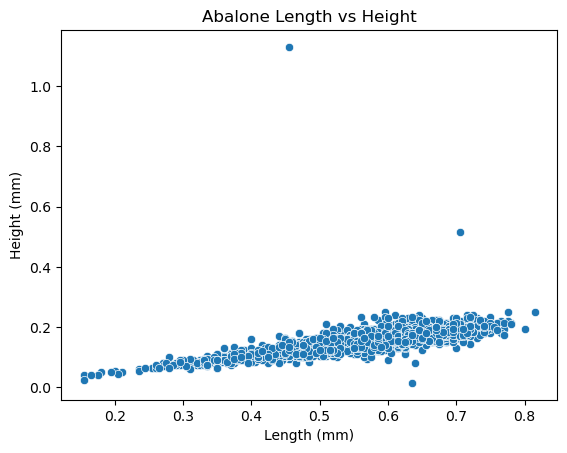

In [20]:
# Create multiple scatter plots
# Scatter plot of 'Length' vs 'Height'
ax = sns.scatterplot(data, x='Length', y='Height')
ax.set(title='Abalone Length vs Height', xlabel='Length (mm)', ylabel='Height (mm)')

[Text(0.5, 1.0, 'Abalone Length vs Age'),
 Text(0.5, 0, 'Length'),
 Text(0, 0.5, 'Age')]

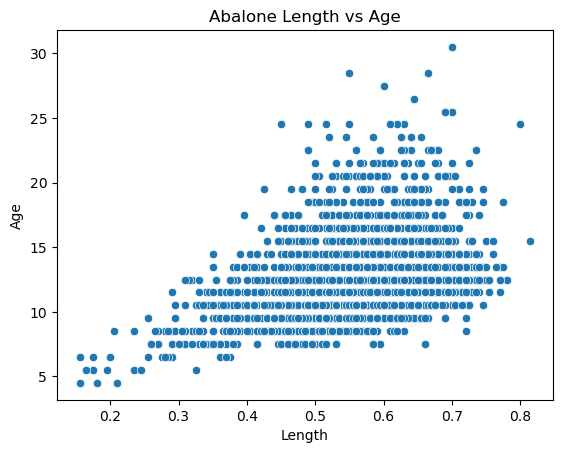

In [21]:
# Scatter plot of 'Length' vs 'Age'
ax = sns.scatterplot(data, x='Length', y='Age')
ax.set(title='Abalone Length vs Age', xlabel='Length', ylabel='Age')

[Text(0.5, 1.0, 'Abalone Diameter vs Age'),
 Text(0.5, 0, 'Diameter (mm)'),
 Text(0, 0.5, 'Age')]

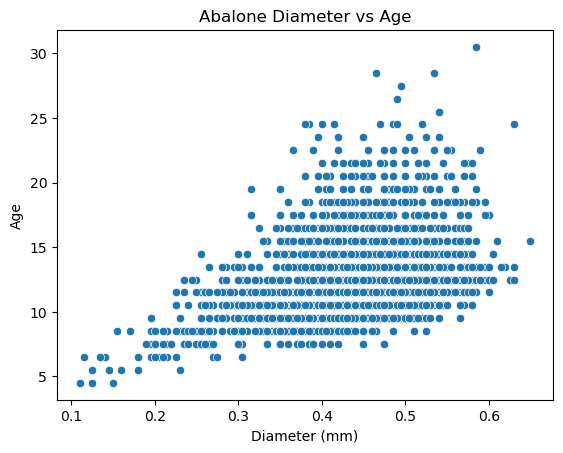

In [13]:
# Scatter Plot of 'Diameter' vs 'Age'
ax = sns.scatterplot(data, x='Diameter', y='Age')
ax.set(title='Abalone Diamter vs Age', xlabel='Diameter (mm)', ylabel='Age')

[Text(0.5, 1.0, 'Abalone Length vs Whole Weight Grouped by Sex'),
 Text(0.5, 0, 'Length (mm)'),
 Text(0, 0.5, 'Whole Weight (grams)')]

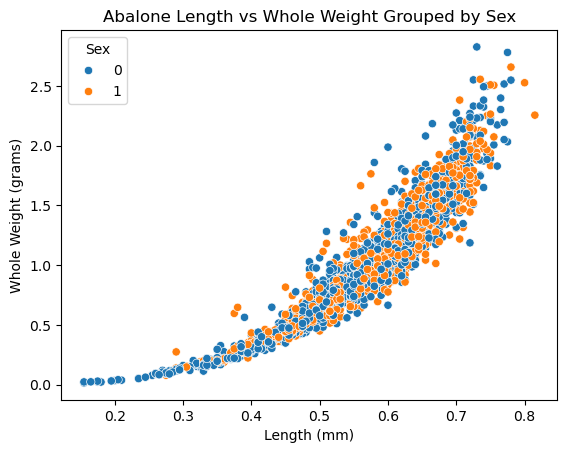

In [22]:
# Scatter Plot of 'Length' vs 'Whole_weight' Grouped by 'Sex'
ax = sns.scatterplot(data, x='Length', y='Whole_weight', hue='Sex')
ax.set(title='Abalone Length vs Whole Weight Grouped by Sex', xlabel='Length (mm)', ylabel='Whole Weight (grams)')

[Text(0.5, 1.0, 'Age of an Abalone Grouped by Sex'),
 Text(0.5, 0, 'Length'),
 Text(0, 0.5, 'Age')]

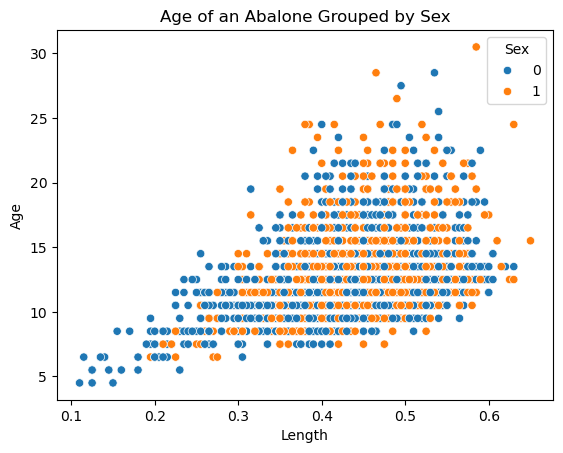

In [21]:
# Scatter Plot of 'Diameter' vs 'Age'  Grouped by 'Sex
ax = sns.scatterplot(data, x='Diameter', y='Age', hue='Sex')
ax.set(title='Age of an Abalone Grouped by Sex', xlabel='Length', ylabel='Age')

**STEP 3 (20 pts.).**
**Build and evaluate classification models from data**

In [23]:
# Partition data into training and testing
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.loc[:, 'Sex'], test_size=0.2, random_state=0)

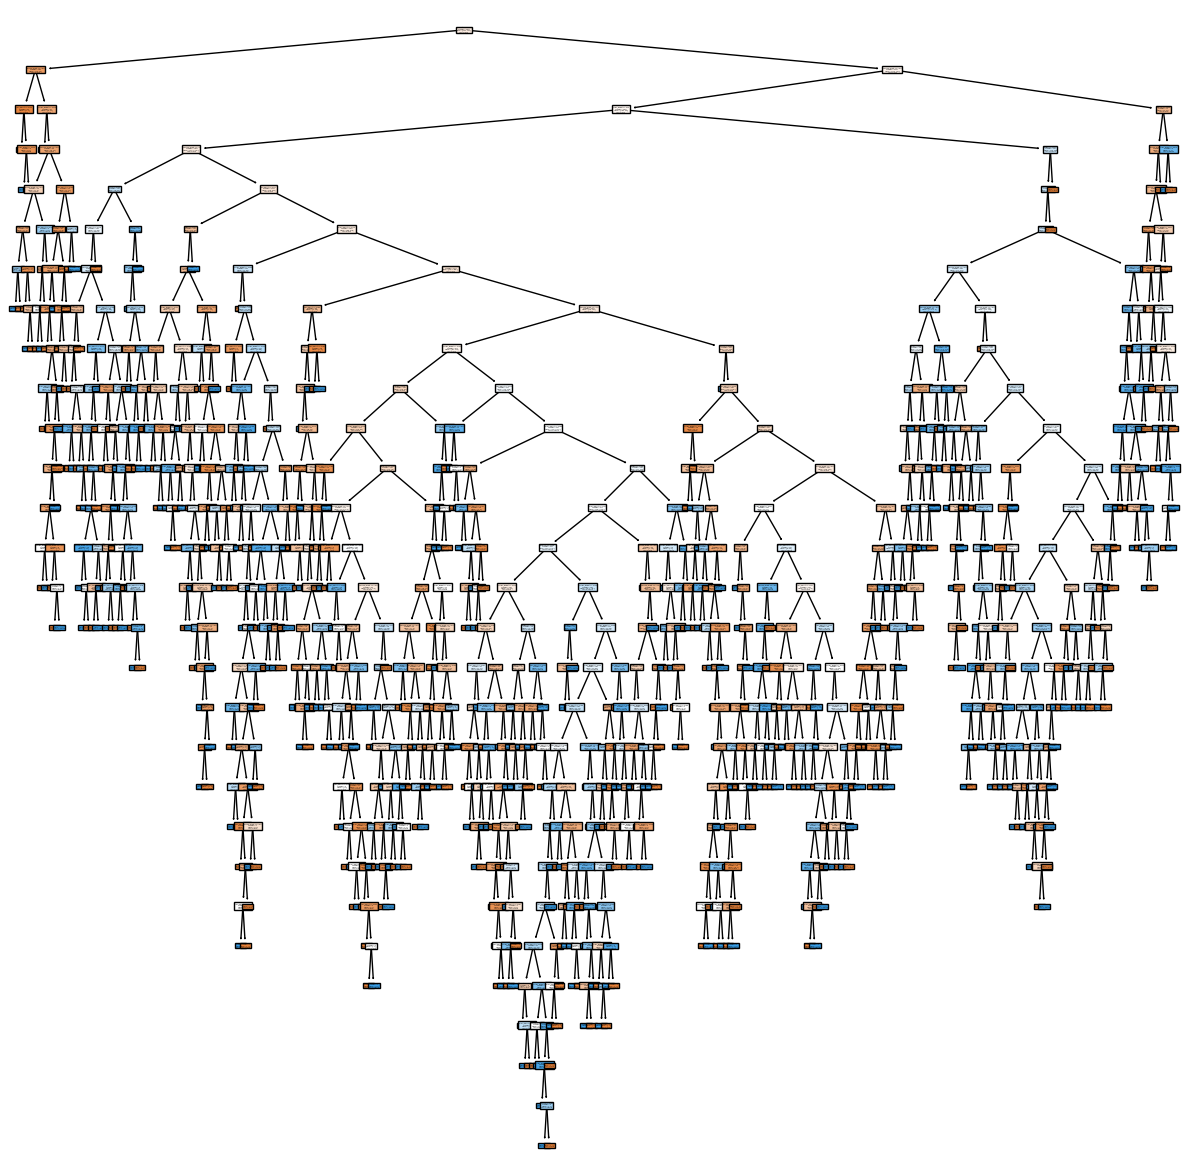

In [24]:
# Build and train decision tree using training set
# Decision tree with no max_depth
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
predictors = x_train.columns
plot_tree(model, predictors)

# Using decision tree to predict 'Sex' with the test set
y_pred = model.predict(x_test)

In [25]:
# Confusion matrix for no max_depth
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[177 119]
 [138 133]]


In [26]:
# Evaluate decision tree using test set for no max_depth
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
error = 1 - accuracy
print(error)
precision = metrics.precision_score(y_test, y_pred, average=None)
print(precision)
recall = metrics.recall_score(y_test, y_pred, average=None)
print(recall)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(F1_score)

0.54673721340388
0.45326278659611996
[0.56190476 0.52777778]
[0.59797297 0.49077491]
[0.57937807 0.50860421]


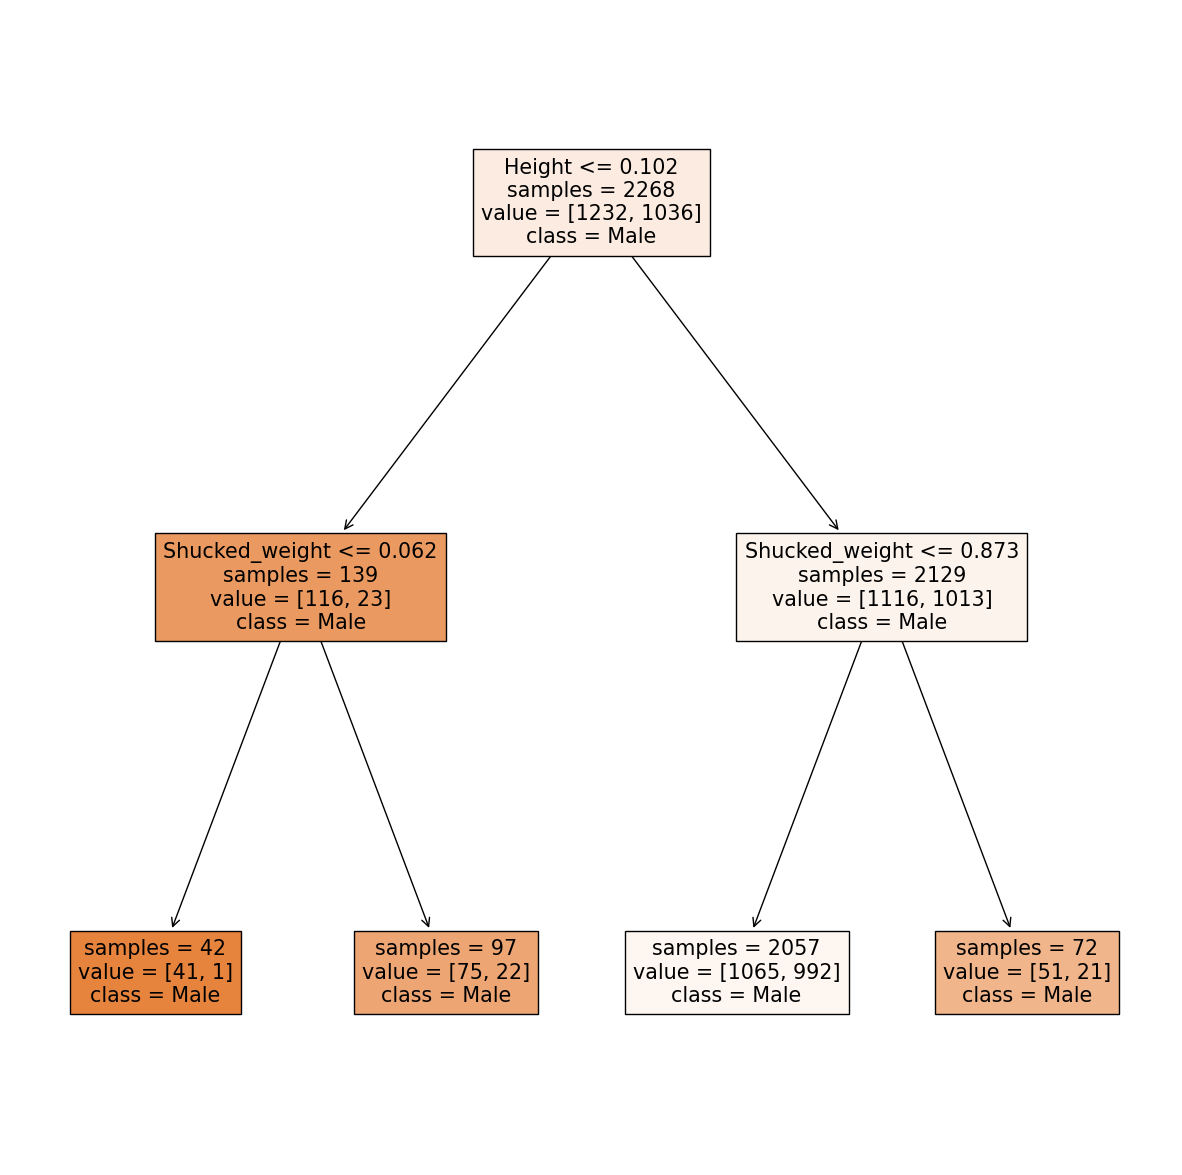

[[296   0]
 [271   0]]
0.5220458553791887
0.4779541446208113
[0.52204586 0.        ]
[1. 0.]
[0.68597914 0.        ]


/nix/store/r5ja4kg8kac6l8z79xswyhdmbqvmy5fb-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Build and evaluate more decision trees
# Decision Tree when max_depth = 2
model = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(x_train, y_train)

# Plotting decision tree when max_depth = 2
predictors = x_train.columns
plot_tree(model, predictors)

# Using decision tree with max_depth = 2 for prediction using test set
y_pred = model.predict(x_test)

# Computing and printing confusion matrix when max_depth = 2
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Compute and print evaluation metrics when max_depth = 2
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
error = 1 - accuracy
print(error)
precision = metrics.precision_score(y_test, y_pred, average=None)
print(precision)
recall = metrics.recall_score(y_test, y_pred, average=None)
print(recall)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(F1_score)

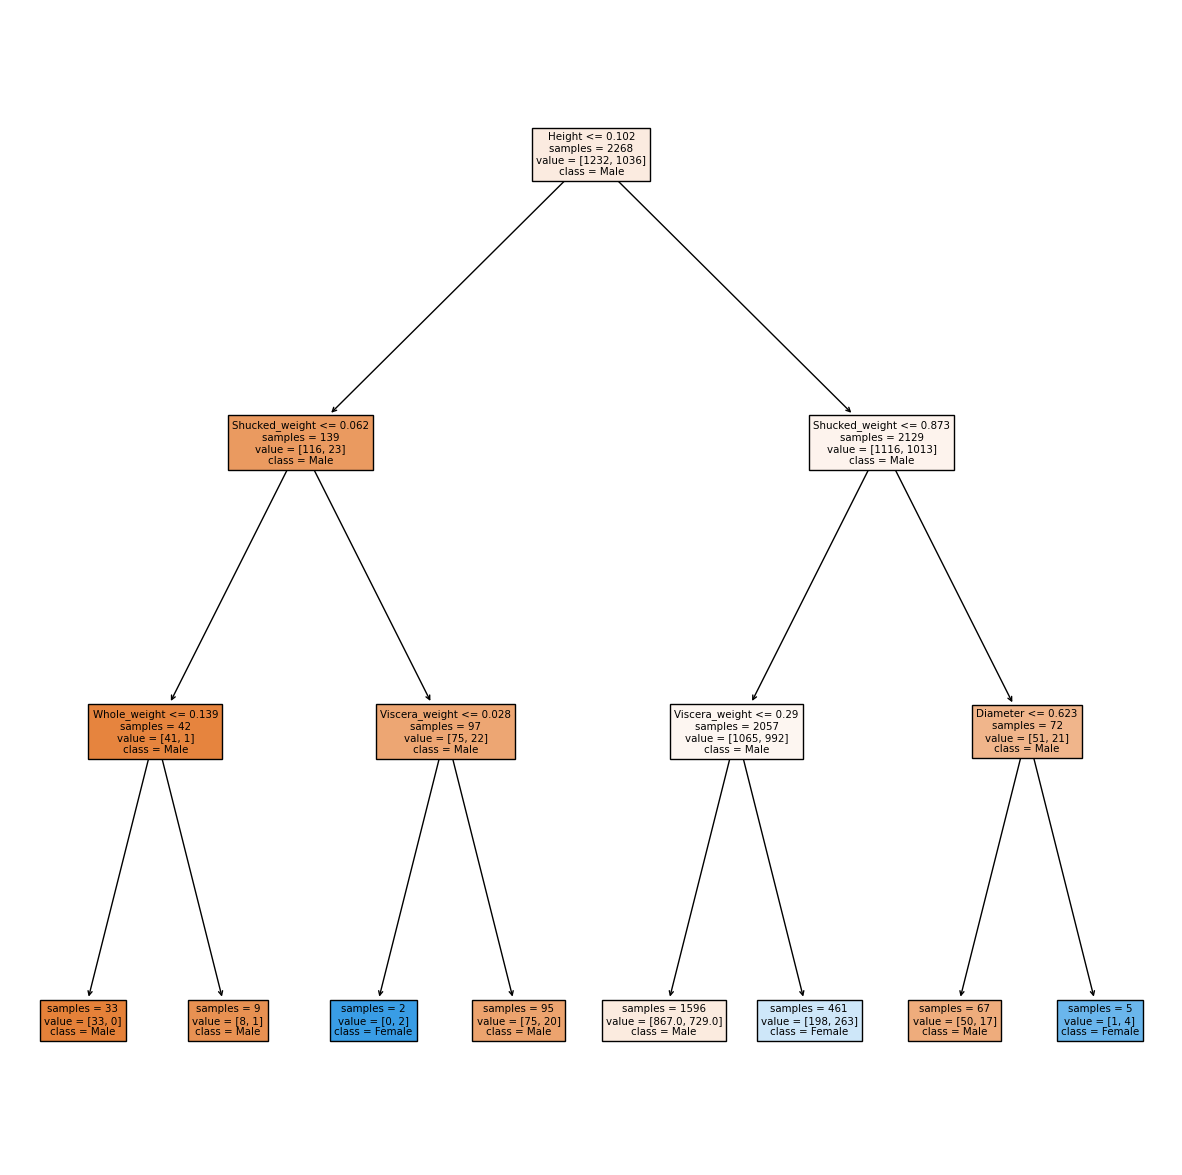

[[230  66]
 [205  66]]
0.5220458553791887
0.4779541446208113
[0.52873563 0.5       ]
[0.77702703 0.24354244]
[0.62927497 0.32754342]


In [28]:
# Build and evaluate more decision trees
# Decision Tree when max_depth = 3
model = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(x_train, y_train)

# Plotting decision tree when max_depth = 3
predictors = x_train.columns
plot_tree(model, predictors)

# Using decision tree with max_depth = 3 for prediction using test set
y_pred = model.predict(x_test)

# Computing and printing confusion matrix when max_depth = 3
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Compute and print evaluation metrics when max_depth = 3
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
error = 1 - accuracy
print(error)
precision = metrics.precision_score(y_test, y_pred, average=None)
print(precision)
recall = metrics.recall_score(y_test, y_pred, average=None)
print(recall)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(F1_score)

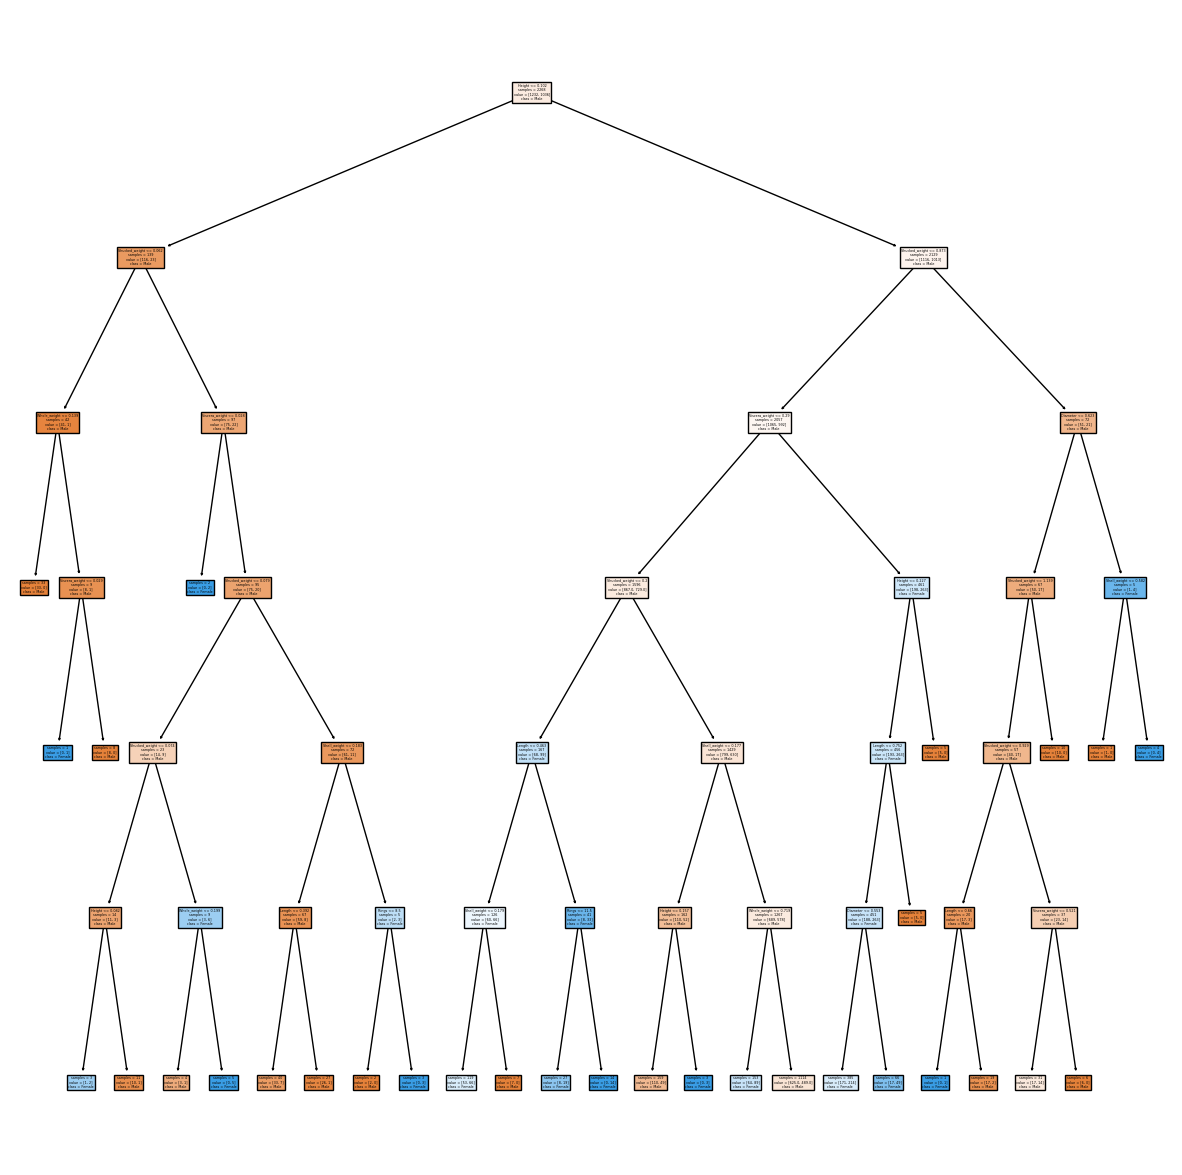

[[194 102]
 [171 100]]
0.5185185185185185
0.4814814814814815
[0.53150685 0.4950495 ]
[0.65540541 0.36900369]
[0.58698941 0.42283298]


In [29]:
# Build and evaluate more decision trees
# Decision Tree when max_depth = 6
model = tree.DecisionTreeClassifier(max_depth=6, random_state=0)
model.fit(x_train, y_train)

# Plotting decision tree when max_depth = 6
predictors = x_train.columns
plot_tree(model, predictors)

# Using decision tree with max_depth = 6 for prediction using test set
y_pred = model.predict(x_test)

# Computing and printing confusion matrix when max_depth = 6
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Compute and print evaluation metrics when max_depth = 6
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
error = 1 - accuracy
print(error)
precision = metrics.precision_score(y_test, y_pred, average=None)
print(precision)
recall = metrics.recall_score(y_test, y_pred, average=None)
print(recall)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(F1_score)

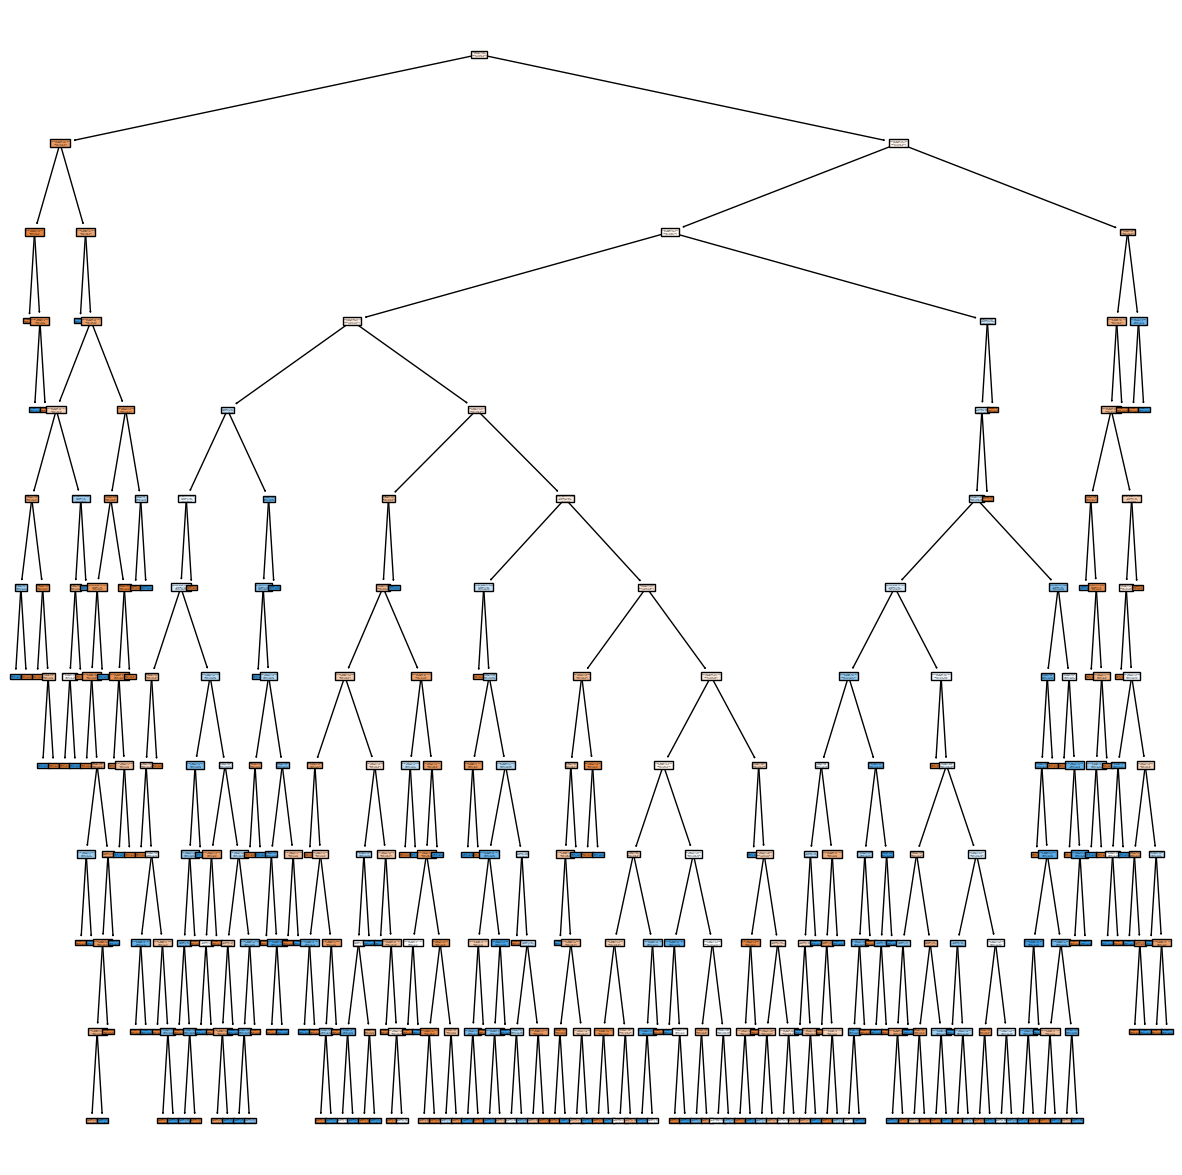

[[142 154]
 [117 154]]
0.5220458553791887
0.4779541446208113
[0.54826255 0.5       ]
[0.47972973 0.56826568]
[0.51171171 0.53195164]


In [30]:
# Build and evaluate more decision trees
# Decision Tree when max_depth = 12
model = tree.DecisionTreeClassifier(max_depth=12, random_state=0)
model.fit(x_train, y_train)

# Plotting decision tree when max_depth = 12
predictors = x_train.columns
plot_tree(model, predictors)

# Using decision tree with max_depth = 12 for prediction using test set
y_pred = model.predict(x_test)

# Computing and printing confusion matrix when max_depth = 12
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Compute and print evaluation metrics when max_depth = 12
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
error = 1 - accuracy
print(error)
precision = metrics.precision_score(y_test, y_pred, average=None)
print(precision)
recall = metrics.recall_score(y_test, y_pred, average=None)
print(recall)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
print(F1_score)

**STEP 4 (20 pts.).**
**Build and evaluate regression models from data**

In [31]:
# Partition data into training and testing
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1:8], data.loc[:, 'Age'], test_size=0.2, random_state=0)

In [32]:
# Build and train linear regression model using training set
# Building a simple linear regression model to predict 'Age' using 'Length'
model = linear_model.LinearRegression()
model.fit(x_train[['Length']], y_train)

LinearRegression()

In [33]:
# Evaluate linear regression model using test set
# intercept and coefficient of model
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

# simple linear regression model to predict 'Age' for the test set
y_pred = model.predict(x_test[['Length']])

# mean squared error (MSE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

# root mean squared error (RMSE)
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {RMSE}')

# coefficient of determination (R squared)
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R Squared: {R_squared}')

Intercept: 6.885817647909288
Coefficient: [9.64157982]
Mean Squared Error: 9.427815264628501
Root Mean Squared Error: 3.0704747620894883
R Squared: 0.10652708193994176


In [34]:
# Build and evaluate more linear regression models
# Building a simple linear regression model to predict 'Age' using 'Length', 'Diameter', 'Height', 'Whole_weight'
model = linear_model.LinearRegression()
model.fit(x_train[['Length', 'Diameter', 'Height', 'Whole_weight']], y_train)

LinearRegression()

In [35]:
# Evaluate linear regression model using test set
# intercept and coefficient of model
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: 6.989573684155745
Coefficient: [-19.30928643  23.48226221  39.6747649   -0.20267417]


In [36]:
# multiple linear regression model to predict 'Age' for the test set
y_pred = model.predict(x_test[['Length', 'Diameter', 'Height', 'Whole_weight']])

# mean squared error (MSE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

# root mean squared error (RMSE)
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {RMSE}')

# coefficient of determination (R squared)
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R Squared: {R_squared}')

Mean Squared Error: 12.265430216133286
Root Mean Squared Error: 3.5022036228827824
R Squared: -0.1623933455279094


In [38]:
# Multiple linear regression model for 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight'
# multiple linear regression model using all values
model = linear_model.LinearRegression()
model.fit(x_train[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight']], y_train)

# Evaluate linear regression model using test set
# intercept and coefficient of model
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: 7.008998814864574
Coefficient: [ -9.05935224  14.5295134   21.96911313   9.95868848 -21.57677049]


In [39]:
# multiple linear regression model to predict 'Age' for the test set
y_pred = model.predict(x_test[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight']])

# mean squared error (MSE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

# root mean squared error (RMSE)
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {RMSE}')

# coefficient of determination (R squared)
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R Squared: {R_squared}')

Mean Squared Error: 7.052022101716591
Root Mean Squared Error: 2.6555643659524786
R Squared: 0.33168071407972943


In [47]:
# multiple linear regression model using all values
model = linear_model.LinearRegression()
model.fit(x_train[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']], y_train)

LinearRegression()

In [48]:
# intercept and coefficient of model
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: 7.1557818797831665
Coefficient: [ -5.75202972  10.55358039  18.65200587   8.76898244 -18.59782037
  -9.77392677   8.01510035]


In [50]:
# multiple linear regression model to predict 'Age' for the test set
y_pred = model.predict(x_test[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']])

# mean squared error (MSE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

# root mean squared error (RMSE)
RMSE = metrics.root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error: {RMSE}')

# coefficient of determination (R squared)
R_squared = metrics.r2_score(y_test, y_pred)
print(f'R Squared: {R_squared}')

Mean Squared Error: 6.487602179510474
Root Mean Squared Error: 2.5470771836578634
R Squared: 0.38517072218338333
